# Sales Data Case Study – Exploratory Data Analysis (EDA)

## 1. Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Loading the Dataset

### We load the sales data from the provided Excel file and read the sheet containing the sales records.

In [2]:
file_path = "C:/Users/patha/OneDrive/Desktop/Case studies/Sales Data/Sales+Data+for+Power+BI.xlsx"
df = pd.read_excel(file_path, sheet_name="Sales Data for Power BI")


## 3. Displaying the First Few Rows

### To get an initial look at the dataset, we display the first five rows.

In [3]:
df.head()


,orderdate,ordernumber,productName,productLine,customerName,customer_city,customer_country,office_city,office_country,buyPrice,priceEach,QuantityOrdered,sales_value,cost_of_sales
0,2003-01-06,10100,1917 Grand Touring Sedan,Vintage Cars,Online Diecast Creations Co.,Nashua,USA,Boston,USA,86.70,136.00,30,4080.00,2601.00
1,2003-01-06,10100,1911 Ford Town Car,Vintage Cars,Online Diecast Creations Co.,Nashua,USA,Boston,USA,33.30,55.09,50,2754.50,1665.00
2,2003-01-06,10100,1932 Alfa Romeo 8C2300 Spider Sport,Vintage Cars,Online Diecast Creations Co.,Nashua,USA,Boston,USA,43.26,75.46,22,1660.12,951.72
3,2003-01-06,10100,1936 Mercedes Benz 500k Roadster,Vintage Cars,Online Diecast Creations Co.,Nashua,USA,Boston,USA,21.75,35.29,49,1729.21,1065.75
4,2003-01-09,10101,1932 Model A Ford J-Coupe,Vintage Cars,"Blauer See Auto, Co.",Frankfurt,Germany,London,UK,58.48,108.06,25,2701.50,1462.00


## 4. Understanding the Dataset Structure

### We check the structure of the dataset, including column names, data types, and missing values.

In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   orderdate         2996 non-null   datetime64[ns]
 1   ordernumber       2996 non-null   int64         
 2   productName       2996 non-null   object        
 3   productLine       2996 non-null   object        
 4   customerName      2996 non-null   object        
 5   customer_city     2996 non-null   object        
 6   customer_country  2996 non-null   object        
 7   office_city       2996 non-null   object        
 8   office_country    2996 non-null   object        
 9   buyPrice          2996 non-null   float64       
 10  priceEach         2996 non-null   float64       
 11  QuantityOrdered   2996 non-null   int64         
 12  sales_value       2996 non-null   float64       
 13  cost_of_sales     2996 non-null   float64       
dtypes: datetime64[ns](1), fl

orderdate           0
ordernumber         0
productName         0
productLine         0
customerName        0
customer_city       0
customer_country    0
office_city         0
office_country      0
buyPrice            0
priceEach           0
QuantityOrdered     0
sales_value         0
cost_of_sales       0
dtype: int64

## 5. Checking for Duplicates

### We check if there are any duplicate records in the dataset to maintain data integrity.

In [5]:
df.duplicated().sum()


0

## 6. Visualizing Sales Trends Over Time

### We analyze sales trends over time by plotting the total sales per month.

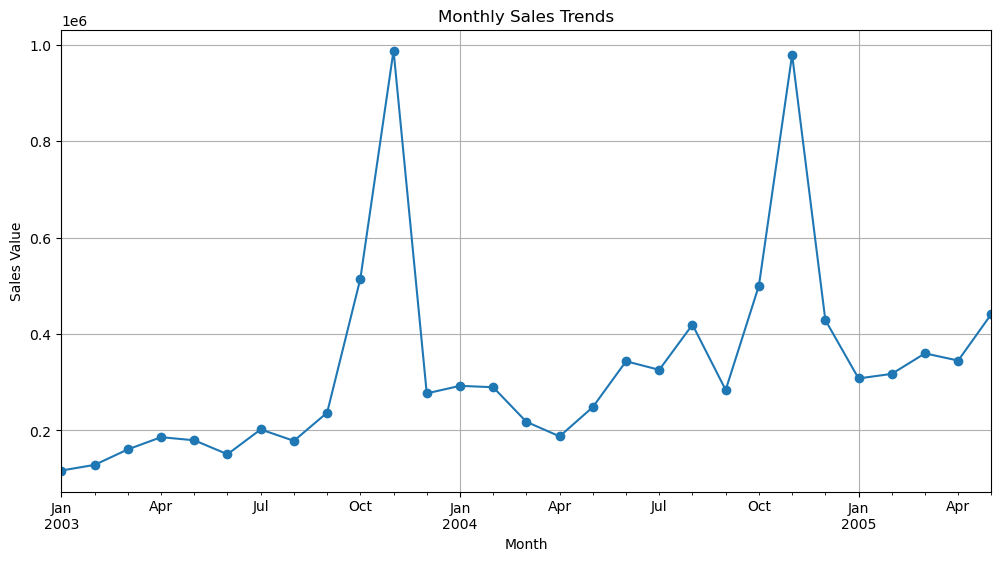

In [6]:
df['orderdate'] = pd.to_datetime(df['orderdate'])
plt.figure(figsize=(12,6))
df.groupby(df['orderdate'].dt.to_period("M"))['sales_value'].sum().plot(kind='line', marker='o')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Sales Value")
plt.grid()
plt.show()


## 7. Sales Distribution Across Different Product Lines

### We analyze the sales performance of different product categories.

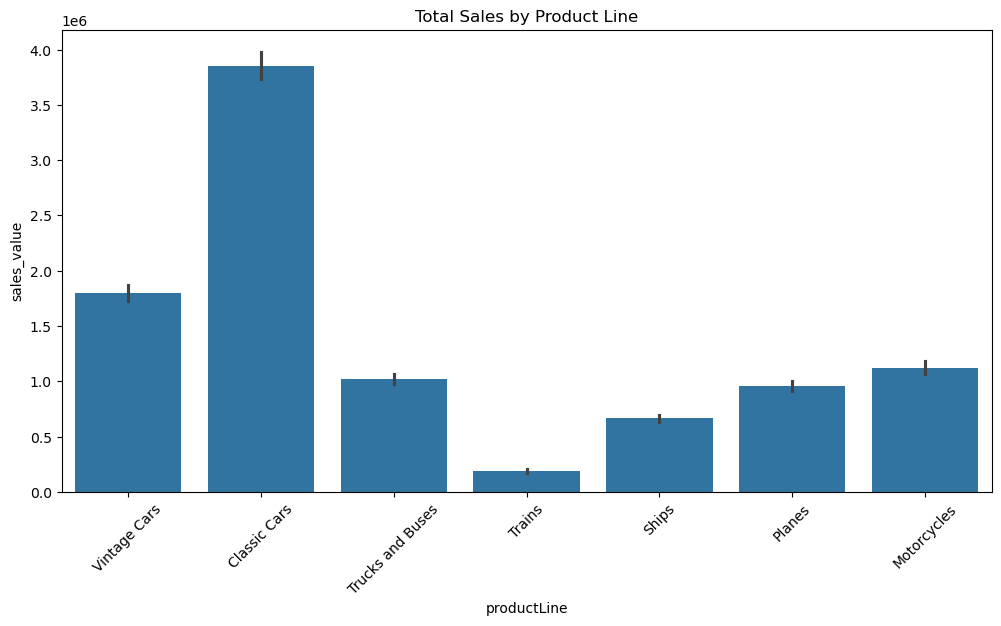

In [7]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['productLine'], y=df['sales_value'], estimator=np.sum)
plt.xticks(rotation=45)
plt.title("Total Sales by Product Line")
plt.show()


## 8. Top 10 Customers by Total Sales

### We identify the top 10 customers based on total sales revenue.

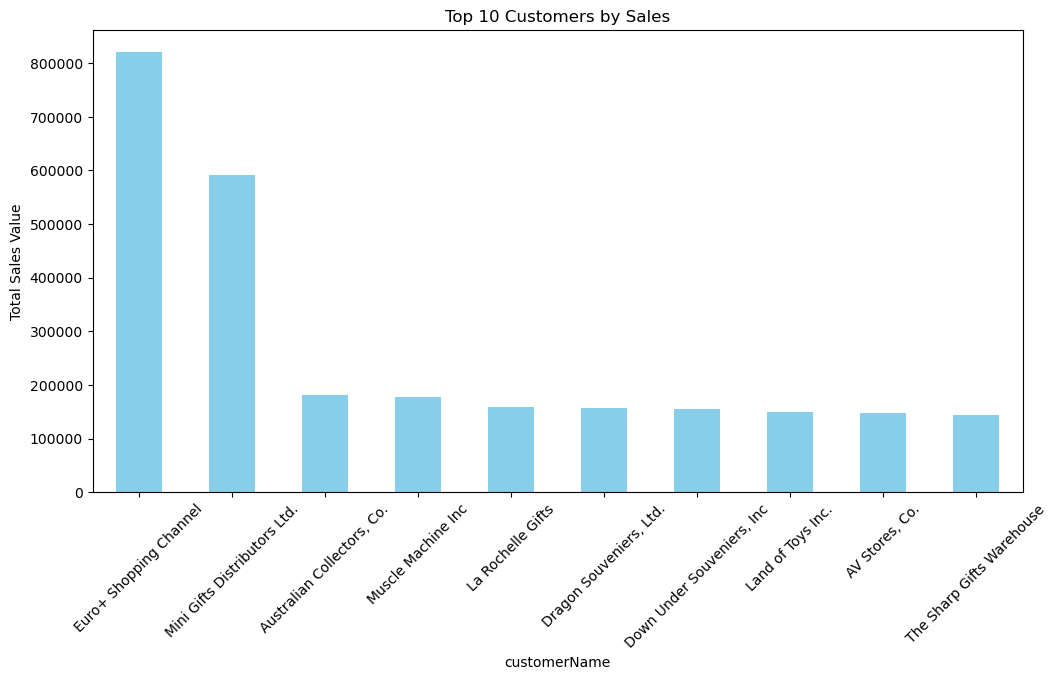

In [8]:
top_customers = df.groupby('customerName')['sales_value'].sum().nlargest(10)
plt.figure(figsize=(12,6))
top_customers.plot(kind='bar', color='skyblue')
plt.title("Top 10 Customers by Sales")
plt.ylabel("Total Sales Value")
plt.xticks(rotation=45)
plt.show()


## 9. Sales Performance by Countryy

### We analyze sales performance across different countries to see where most revenue is generated.

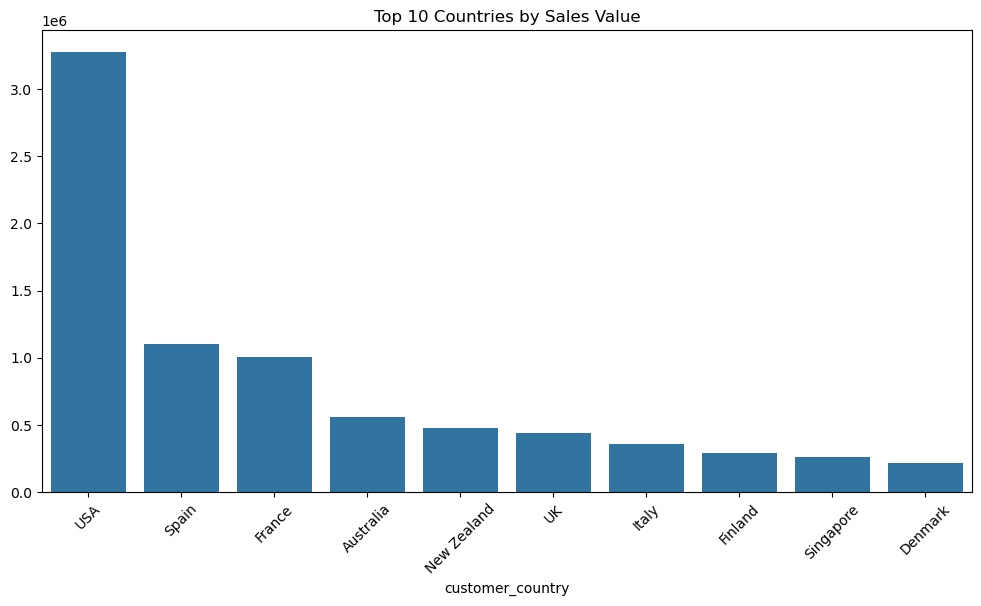

In [9]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.groupby('customer_country')['sales_value'].sum().sort_values(ascending=False).index[:10],
            y=df.groupby('customer_country')['sales_value'].sum().sort_values(ascending=False).values[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Sales Value")
plt.show()


## 10. Profit Analysis

### We calculate the profit for each sale and visualize its distribution.

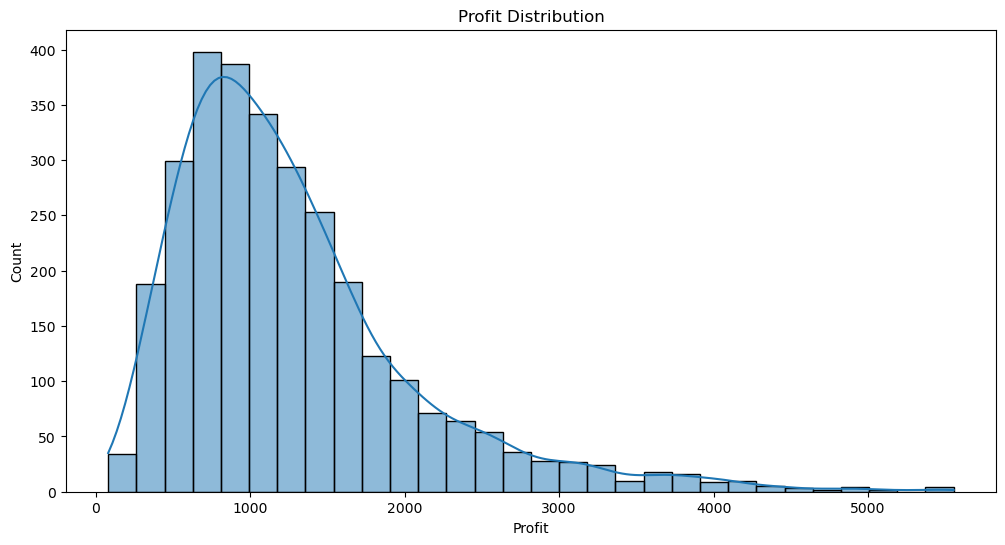

In [10]:
df['profit'] = df['sales_value'] - df['cost_of_sales']
plt.figure(figsize=(12,6))
sns.histplot(df['profit'], bins=30, kde=True)
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.show()


## 11. Correlation Analysis

### We examine the correlation between key numerical variables such as price, quantity, and sales.

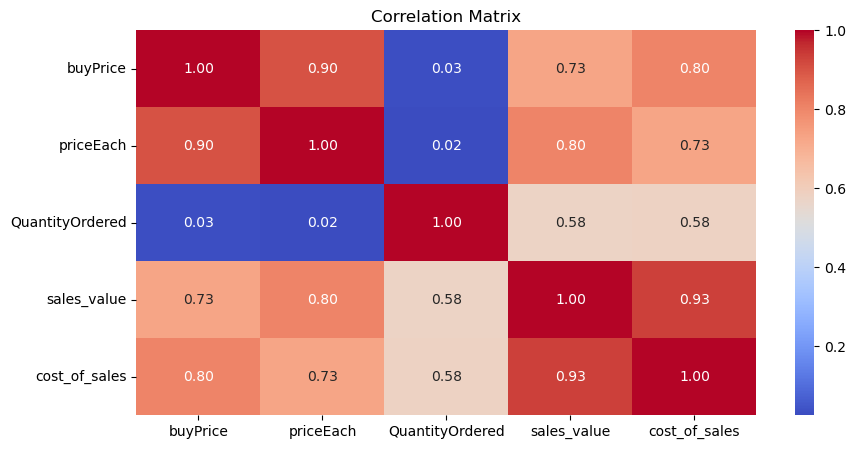

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['buyPrice', 'priceEach', 'QuantityOrdered', 'sales_value', 'cost_of_sales']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## Conclusion

Sales Trends: Fluctuating sales with peak months, likely due to seasonal demand.
Top Performers: Vintage & Classic Cars drive the most revenue.
Key Customers & Countries: USA, Germany, and the UK generate the highest sales.
Profitability: Some products have thin margins; pricing optimization needed.
Correlations: Higher quantity ordered strongly impacts revenue